In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns


In [55]:
ticker='GME' #time series dataset of GameStop's (GME) stock prices
start_date = "2020-01-01"
end_date = "2024-12-31"
gme_data=yf.download(ticker,start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [56]:
gme_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME
Date,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600


In [57]:
gme_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, GME)   1257 non-null   float64
 1   (High, GME)    1257 non-null   float64
 2   (Low, GME)     1257 non-null   float64
 3   (Open, GME)    1257 non-null   float64
 4   (Volume, GME)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


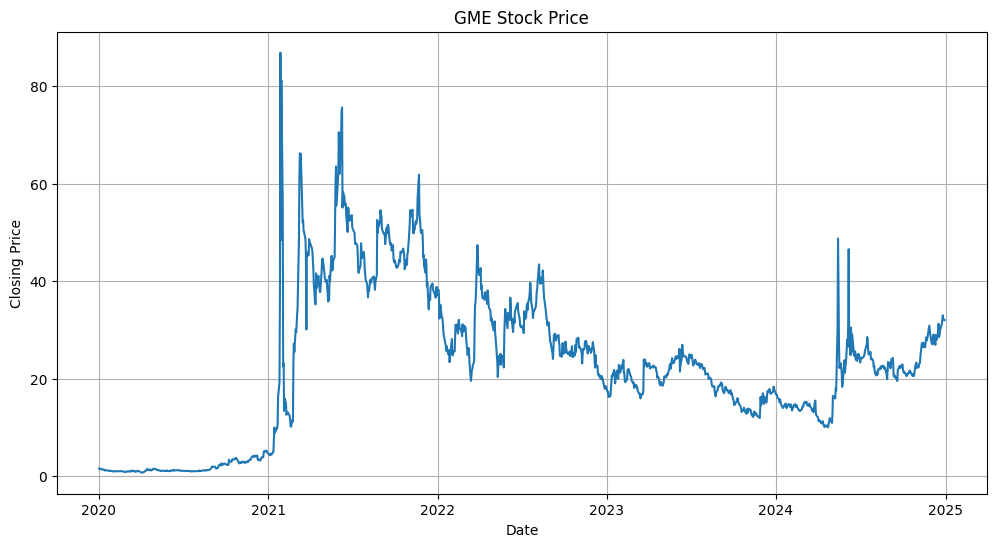

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index, gme_data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [59]:
gme_data['Returns']=gme_data['Close'].pct_change()

In [60]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns
Ticker,GME,GME,GME,GME,GME,
Date,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232


In [61]:
gme_data['Volatility']=gme_data['Returns'].rolling(window=20).std()

# The .rolling(window=...) function creates a moving (or rolling) window over your data.

# It lets you apply a function (like .mean(), .std(), .sum(), etc.) over a specified number of previous rows — like a sliding window.

# You're sliding a window over your dataset and calculating something only for the values inside that window.

#rolling only starts giving values after it has at least 20 values 

In [62]:
gme_data.head(-10)

Price,Close,High,Low,Open,Volume,Returns,Volatility
Ticker,GME,GME,GME,GME,GME,,
Date,,,,,,,
2020-01-02,1.577500,1.617500,1.5175,1.535000,17814400,NaN,NaN
2020-01-03,1.470000,1.562500,1.4600,1.552500,14175600,-0.068146,NaN
2020-01-06,1.462500,1.477500,1.4000,1.450000,13579200,-0.005102,NaN
2020-01-07,1.380000,1.457500,1.3600,1.442500,20912000,-0.056410,NaN
2020-01-08,1.430000,1.462500,1.3525,1.372500,22517600,0.036232,NaN
...,...,...,...,...,...,...,...
2024-12-09,27.930000,29.860001,27.7400,29.000000,11495400,-0.038885,0.040884
2024-12-10,26.930000,28.389999,26.8500,27.879999,18209400,-0.035804,0.036097


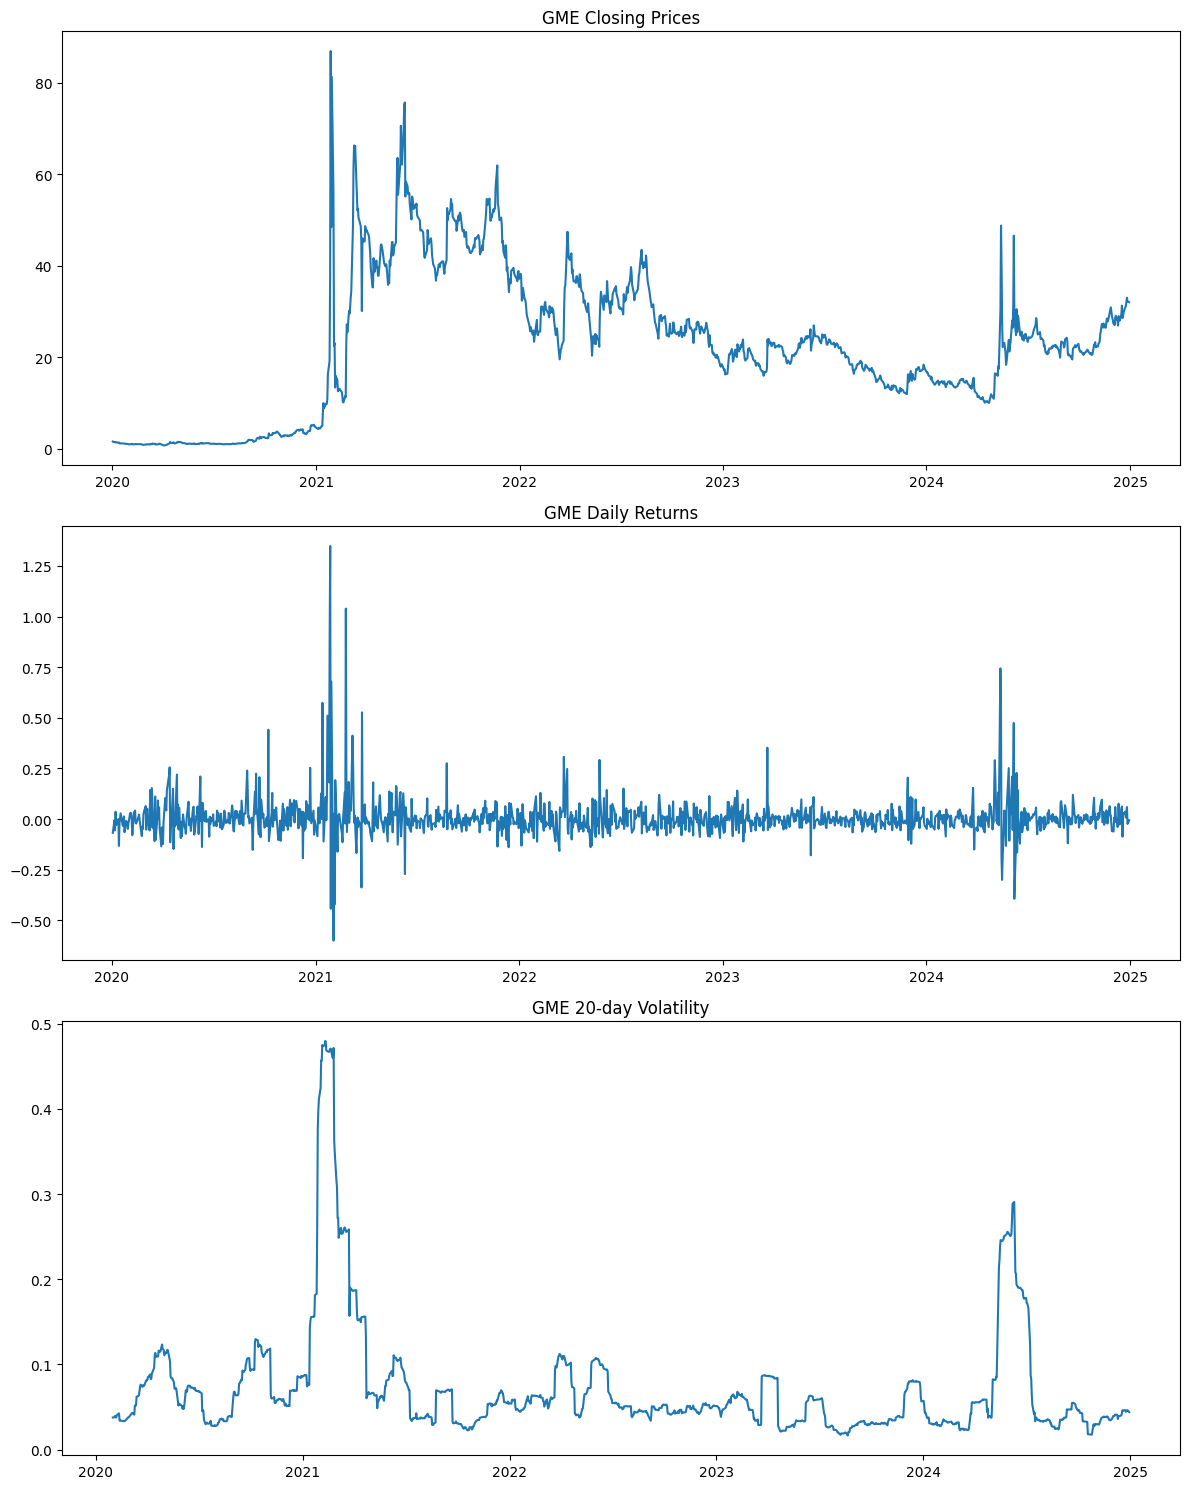

In [63]:
fig,axes=plt.subplots(3,1,figsize=(12,15))
axes[0].plot(gme_data.index, gme_data['Close'])
axes[0].set_title('GME Closing Prices')
axes[1].plot(gme_data.index, gme_data['Returns'])
axes[1].set_title('GME Daily Returns')
axes[2].plot(gme_data.index, gme_data['Volatility'])
axes[2].set_title('GME 20-day Volatility')
plt.tight_layout()

plt.show()

In [64]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns,Volatility
Ticker,GME,GME,GME,GME,GME,,
Date,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN


In [65]:
#now we are calculating the 10  and 20 days moving averages 
#sma : simple moving average
gme_data['SMA_10']=gme_data['Close'].rolling(window=10).mean()
gme_data['SMA_20']=gme_data['Close'].rolling(window=20).mean()
#this is done to smooth out the fluctuations in the closing price of the stock 

In [66]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20
Ticker,GME,GME,GME,GME,GME,,,,
Date,,,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN,NaN,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN,NaN,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN,NaN,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN,NaN,NaN


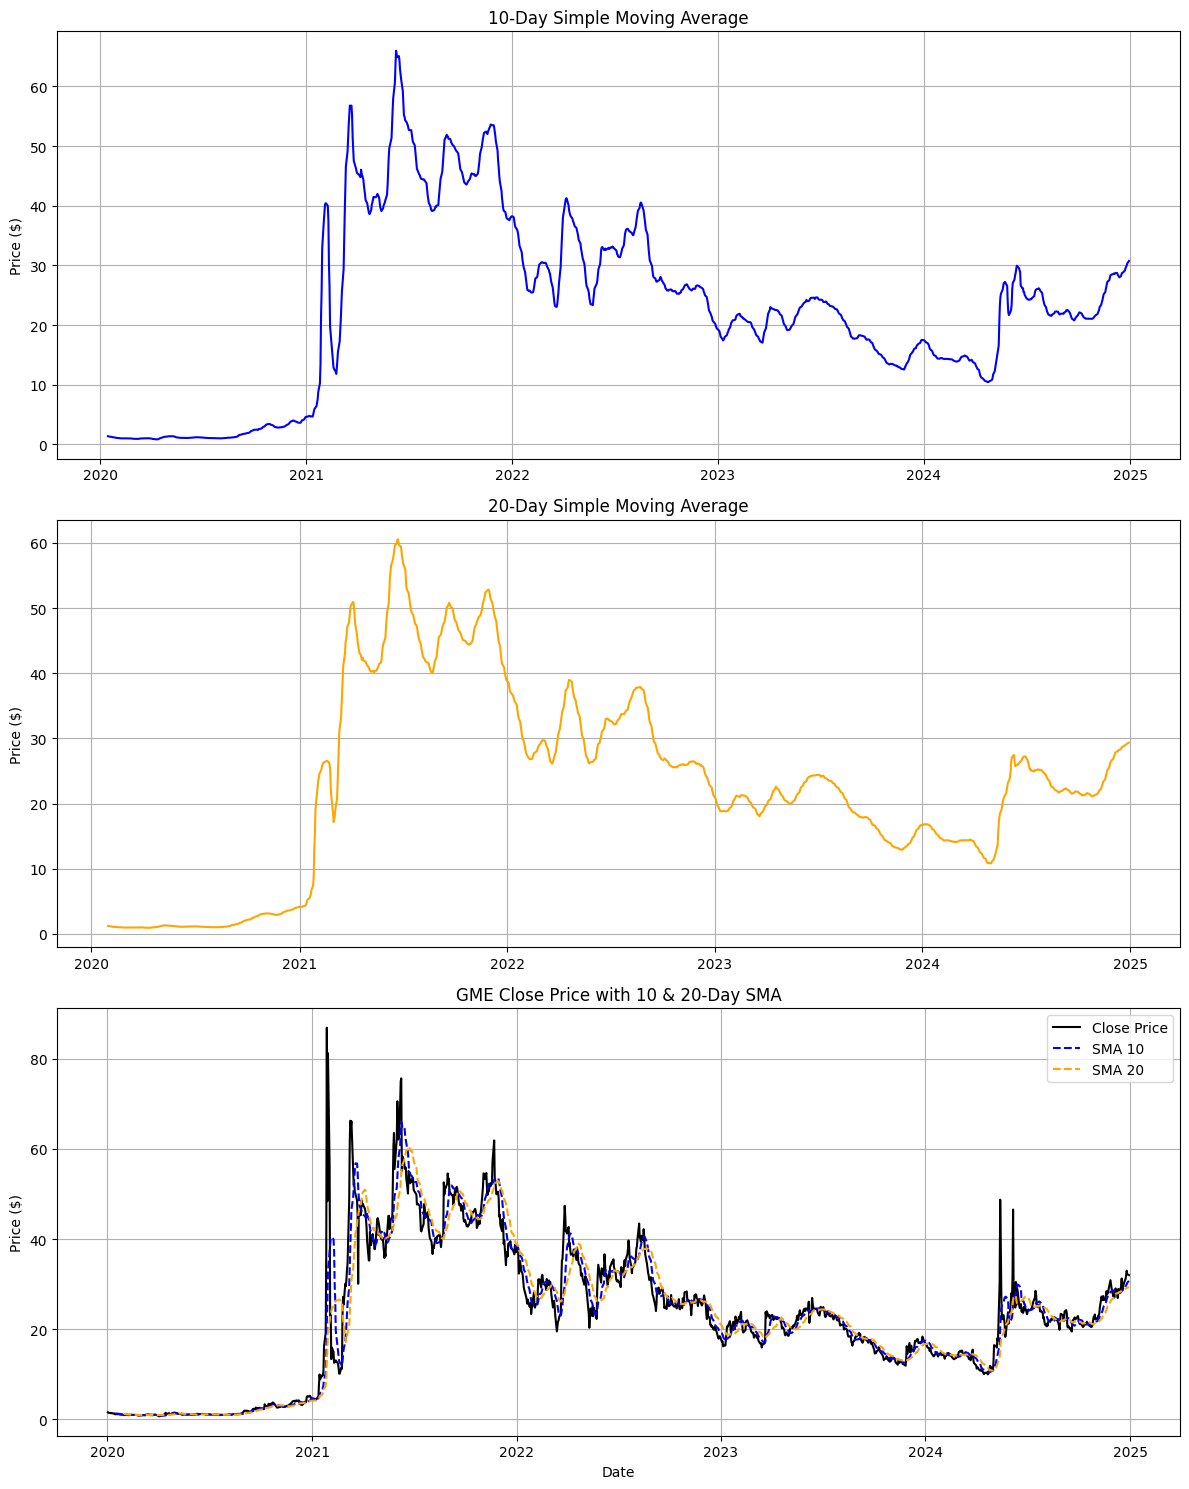

In [67]:
import matplotlib.pyplot as plt

# Create 3 subplots stacked vertically
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot 10-day SMA
axes[0].plot(gme_data.index, gme_data['SMA_10'], color='blue')
axes[0].set_title('10-Day Simple Moving Average')
axes[0].set_ylabel('Price ($)')
axes[0].grid(True)

# Plot 20-day SMA
axes[1].plot(gme_data.index, gme_data['SMA_20'], color='orange')
axes[1].set_title('20-Day Simple Moving Average')
axes[1].set_ylabel('Price ($)')
axes[1].grid(True)

# Plot Close Price with both SMAs for comparison (third subplot)
axes[2].plot(gme_data.index, gme_data['Close'], label='Close Price', color='black')
axes[2].plot(gme_data.index, gme_data['SMA_10'], label='SMA 10', linestyle='--', color='blue')
axes[2].plot(gme_data.index, gme_data['SMA_20'], label='SMA 20', linestyle='--', color='orange')
axes[2].set_title('GME Close Price with 10 & 20-Day SMA')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price ($)')
axes[2].legend()
axes[2].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


In [68]:
gme_data['SMA_50'] = gme_data['Close'].rolling(window=50).mean()

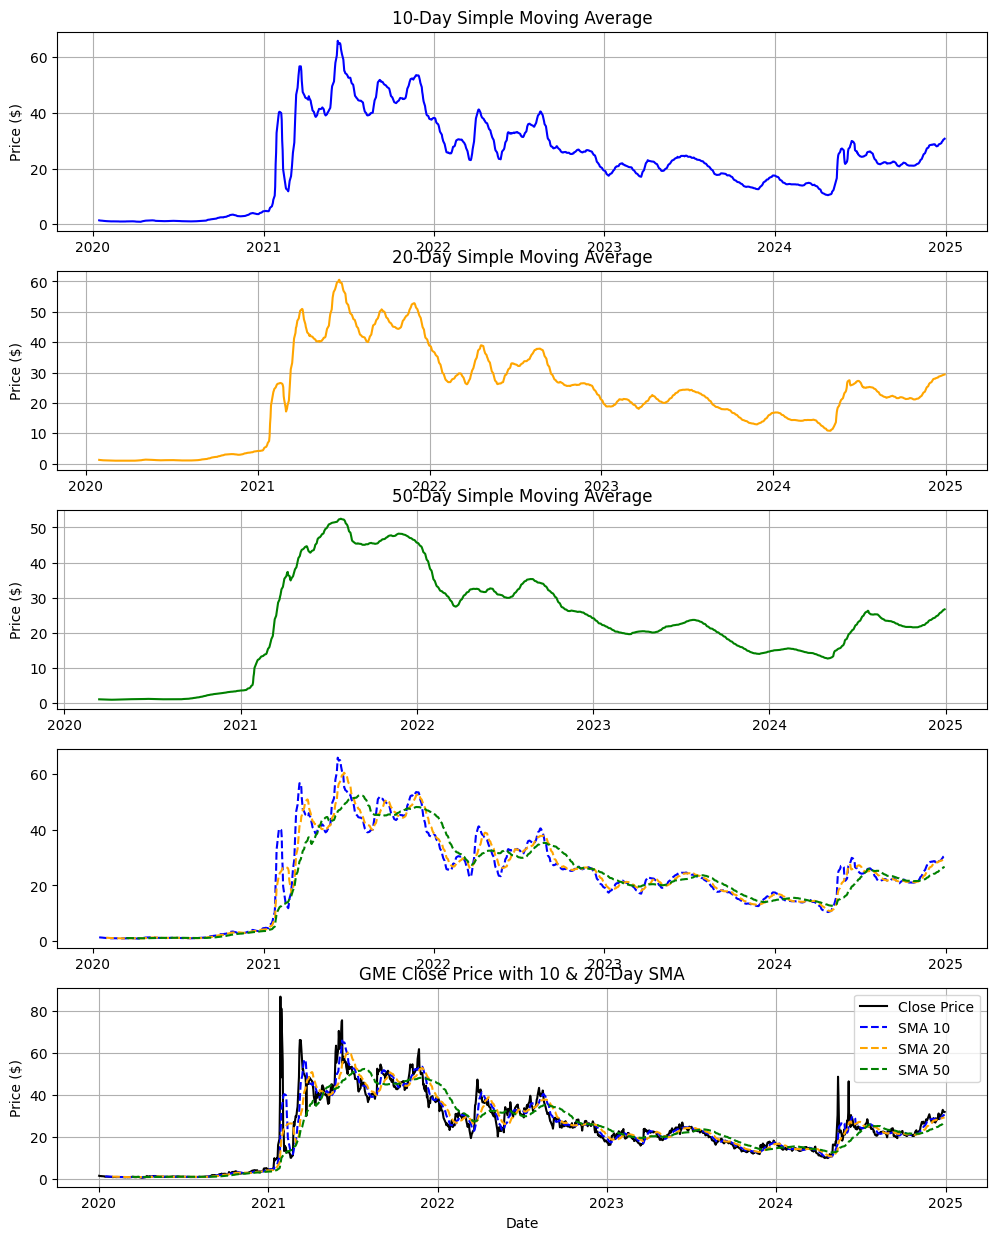

In [69]:
fig, axes = plt.subplots(5, 1, figsize=(12, 15))

# 10 days sma 
axes[0].plot(gme_data.index, gme_data['SMA_10'], color='blue')
axes[0].set_title('10-Day Simple Moving Average')
axes[0].set_ylabel('Price ($)')
axes[0].grid(True)

# Plot 20-day SMA
axes[1].plot(gme_data.index, gme_data['SMA_20'], color='orange')
axes[1].set_title('20-Day Simple Moving Average')
axes[1].set_ylabel('Price ($)')
axes[1].grid(True)

#plot 50-day SMA 
axes[2].plot(gme_data.index , gme_data['SMA_50'] , color='green')
axes[2].set_title('50-Day Simple Moving Average')
axes[2].set_ylabel('Price ($)')
axes[2].grid(True)

axes[3].plot(gme_data.index, gme_data['SMA_10'], label='SMA 10', linestyle='--', color='blue')
axes[3].plot(gme_data.index, gme_data['SMA_20'], label='SMA 20', linestyle='--', color='orange')
axes[3].plot(gme_data.index, gme_data['SMA_50'], label='SMA 50', linestyle='--', color='green')
axes[4].set_title('GME 10 , 20 , 50 Day SMA')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Price ($)')
axes[4].grid(True)

# Plot Close Price with both SMAs for comparison (third subplot)
axes[4].plot(gme_data.index, gme_data['Close'], label='Close Price', color='black')
axes[4].plot(gme_data.index, gme_data['SMA_10'], label='SMA 10', linestyle='--', color='blue')
axes[4].plot(gme_data.index, gme_data['SMA_20'], label='SMA 20', linestyle='--', color='orange')
axes[4].plot(gme_data.index, gme_data['SMA_50'], label='SMA 50', linestyle='--', color='green')
axes[4].set_title('GME Close Price with 10 & 20-Day SMA')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Price ($)')
axes[4].legend()
axes[4].grid(True)

In [70]:
def calculate_rsi(data,periods=14):
    delta=data.diff()
    gain=(delta.where(delta>0,0)).rolling(window=periods).mean()
    loss=(-delta.where(delta<0,0)).rolling(window=periods).mean()
    rs=gain/loss
    return 100-(100/(1+rs))#This converts RS into a number between 0 and 100, making it easy to interpret

    
gme_data['RSI']=calculate_rsi(gme_data['Close'])

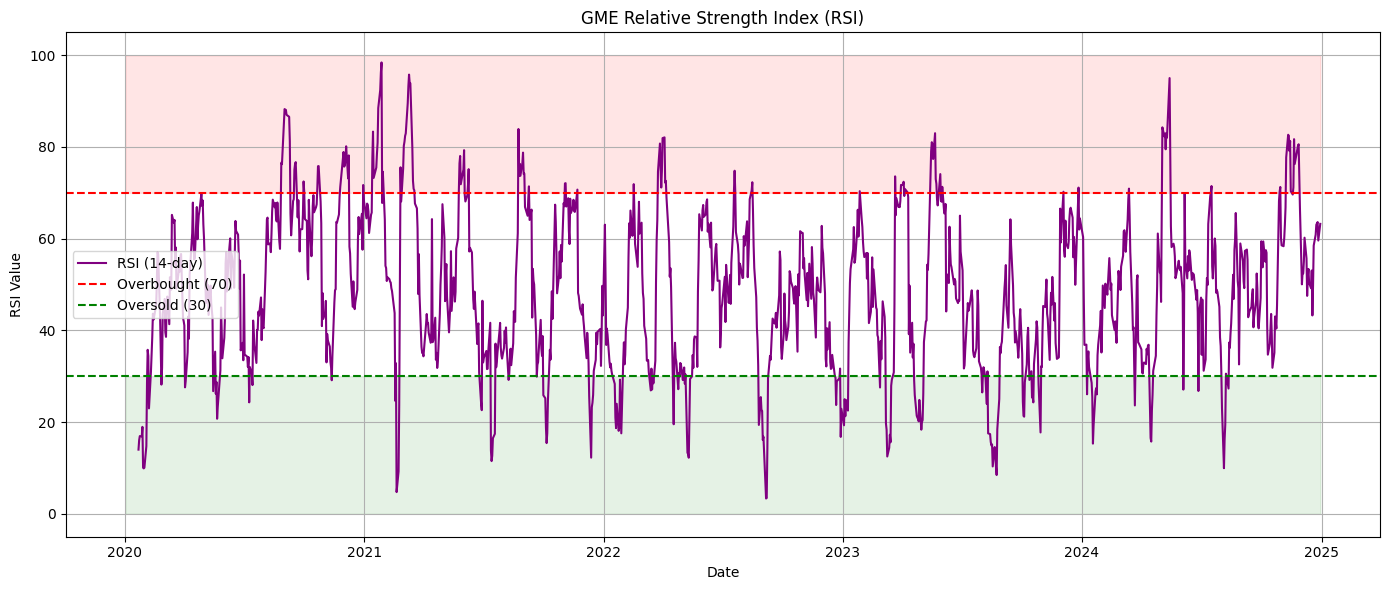

In [71]:
plt.figure(figsize=(14, 6))
plt.plot(gme_data['RSI'], label='RSI (14-day)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.fill_between(gme_data.index, 70, 100, color='red', alpha=0.1)
plt.fill_between(gme_data.index, 0, 30, color='green', alpha=0.1)
plt.title('GME Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

What is Overbought?
A stock is considered overbought when its price has risen too quickly, too far, and may be due for a pullback (drop).

It doesn't mean it will drop — but it's a warning that the stock may be overpriced based on recent momentum.

🔍 RSI Signal:
RSI > 70 → Overbought Zone

Traders might think: "It's been going up a lot... maybe it's time to sell or wait."



What is Oversold?
A stock is oversold when its price has fallen a lot in a short time, possibly more than it should.

It could be a bargain or signal that it might bounce back soon.

🔍 RSI Signal:
RSI < 30 → Oversold Zone

Traders might think: "It's very cheap now... maybe it's time to buy or watch for a rebound."



Simple Analogy:
Imagine a rubber band:

If you stretch it too far up (overbought), it tends to snap back down.

If you stretch it too far down (oversold), it tends to bounce back up.

In [72]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI
Ticker,GME,GME,GME,GME,GME,,,,,,
Date,,,,,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN,NaN,NaN,NaN,NaN


In [73]:
gme_data.head(-10)

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI
Ticker,GME,GME,GME,GME,GME,,,,,,
Date,,,,,,,,,,,
2020-01-02,1.577500,1.617500,1.5175,1.535000,17814400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.470000,1.562500,1.4600,1.552500,14175600,-0.068146,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.462500,1.477500,1.4000,1.450000,13579200,-0.005102,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.380000,1.457500,1.3600,1.442500,20912000,-0.056410,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.430000,1.462500,1.3525,1.372500,22517600,0.036232,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-09,27.930000,29.860001,27.7400,29.000000,11495400,-0.038885,0.040884,28.730,28.0000,24.2626,55.700077
2024-12-10,26.930000,28.389999,26.8500,27.879999,18209400,-0.035804,0.036097,28.456,27.9835,24.3426,47.527050


In [ ]:
rolling_std = gme_data['Close'].rolling(window=20).std()#this is a dataframe 
rolling_std

Ticker,GME
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2024-12-23,1.287190
2024-12-24,1.370040
2024-12-26,1.611791


In [ ]:
gme_data['SMA_20']  # this is a series

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06        NaN
2020-01-07        NaN
2020-01-08        NaN
               ...   
2024-12-23    28.9455
2024-12-24    29.0190
2024-12-26    29.1520
2024-12-27    29.2175
2024-12-30    29.3655
Name: SMA_20, Length: 1257, dtype: float64

In [ ]:
rolling_std_series = rolling_std['GME'] # convert it to series 

In [ ]:
#now calculate the bollinger bands (its like an outlier detector in stocks price which uses formula [SMA − 2×std, SMA + 2×std])
gme_data['Upper_BB'] = gme_data['SMA_20'] + (rolling_std_series * 2)
gme_data['Lower_BB'] = gme_data['SMA_20'] - (rolling_std_series * 2)


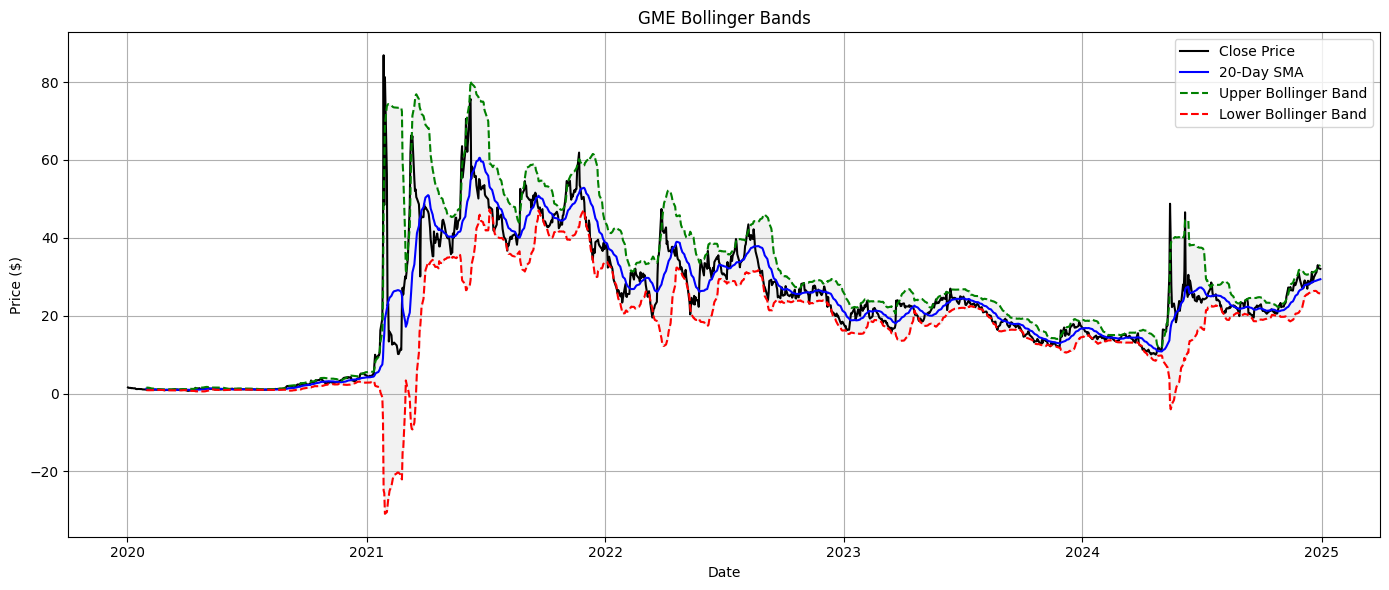

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(gme_data['Close'], label='Close Price', color='black')
plt.plot(gme_data['SMA_20'], label='20-Day SMA', color='blue')
plt.plot(gme_data['Upper_BB'], label='Upper Bollinger Band', linestyle='--', color='green')#ubb
plt.plot(gme_data['Lower_BB'], label='Lower Bollinger Band', linestyle='--', color='red')#lbb
plt.fill_between(gme_data.index, gme_data['Lower_BB'], gme_data['Upper_BB'], color='gray', alpha=0.1)
plt.title('GME Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Prices bounce within the bands
# Bollinger Bands are like time-series-aware box plots, helping detect if a price is abnormally high or low at any point in time

In [98]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI,Upper_BB,Lower_BB
Ticker,GME,GME,GME,GME,GME,,,,,,,,
Date,,,,,,,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gme_data.head() #multiindex dataframe , converting it to a single index 

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI,Upper_BB,Lower_BB
Ticker,GME,GME,GME,GME,GME,,,,,,,,
Date,,,,,,,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Flatten the column MultiIndex (keep only the first level)
gme_data.columns = gme_data.columns.get_level_values(0)

# Reset multi-level index if needed, then set 'Date' as the index
gme_data = gme_data.droplevel([0, 1]) if isinstance(gme_data.index, pd.MultiIndex) else gme_data


In [113]:
gme_data.head()

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI,Upper_BB,Lower_BB
Date,,,,,,,,,,,,,
2020-01-02,1.5775,1.6175,1.5175,1.5350,17814400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.4700,1.5625,1.4600,1.5525,14175600,-0.068146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.4625,1.4775,1.4000,1.4500,13579200,-0.005102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.3800,1.4575,1.3600,1.4425,20912000,-0.056410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.4300,1.4625,1.3525,1.3725,22517600,0.036232,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import plotly.graph_objects as go #api for low level implemntation 

# Create the figure
fig = go.Figure()

# Add 'Close' price line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Close'],
    mode='lines',
    name='Close',
    line=dict(color='blue', width=2)
))

# Add 'SMA 10' line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['SMA_10'],
    mode='lines',
    name='SMA 10',
    line=dict(color='green', width=2, dash='dot')
))

# Add 'SMA 50' line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['SMA_50'],
    mode='lines',
    name='SMA 50',
    line=dict(color='orange', width=2, dash='dash')
))

# Add 'Upper BB' line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Upper_BB'],
    mode='lines',
    name='Upper BB',
    line=dict(color='red', width=1, dash='dot')
))

# Add 'Lower BB' line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Lower_BB'],
    mode='lines',
    name='Lower BB',
    line=dict(color='purple', width=1, dash='dot')
))

# Update layout for a larger figure size and title
fig.update_layout(
    title='GME Stock Price with Technical Indicators',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    legend=dict(x=0, y=1, bgcolor='rgba(255,255,255,0)', bordercolor='rgba(255,255,255,0)'),
    autosize=False,
    width=1200,
    height=600,
   
)

# Show the plot
fig.show()


In [ ]:
from scipy import stats#for statistical functions and tests in python 

Statistical method using z score for finding the outliers 

In [126]:
gme_data['Close_Z_Score']=stats.zscore(gme_data['Close'])#standarization
print('Max z score : ' , gme_data['Close_Z_Score'].max())
print('Max z score : ' , gme_data['Close_Z_Score'].min())
gme_data['Close_Z_Score']

Max z score :  4.159028117004882
Max z score :  -1.4299458436699226


Date
2020-01-02   -1.373036
2020-01-03   -1.380008
2020-01-06   -1.380495
2020-01-07   -1.385845
2020-01-08   -1.382602
                ...   
2024-12-23    0.528651
2024-12-24    0.544216
2024-12-26    0.664197
2024-12-27    0.612962
2024-12-30    0.600639
Name: Close_Z_Score, Length: 1257, dtype: float64

In [ ]:
anomlies_zscore = gme_data[abs(gme_data['Close_Z_Score']) > 3] #filters all rows where the Z-score is greater than 3 or less than -3
anomlies_zscore

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI,Upper_BB,Lower_BB,Close_Z_Score
Date,,,,,,,,,,,,,,
2021-01-27,86.877502,95.000000,62.250000,88.707497,373586800,1.348358,0.376478,21.64025,13.146625,7.52745,98.434327,51.142634,-24.849384,4.159028
2021-01-29,81.250000,103.495003,62.500000,94.927498,202264400,0.678719,0.411380,32.82250,19.146125,10.00510,74.607241,69.157106,-30.864856,3.794061
2021-06-02,70.559998,73.500000,61.075001,62.220001,64076800,0.133403,0.085137,53.88750,46.971500,44.00560,79.300788,67.396985,26.546015,3.100769
2021-06-07,70.002502,70.500000,63.799999,64.500000,24206000,0.127436,0.092455,60.64850,50.783375,45.50915,69.483754,74.262514,27.304236,3.064613
2021-06-08,75.000000,86.165001,70.250000,73.000000,69756400,0.071390,0.086401,63.64825,52.743125,46.10415,71.693999,77.468195,28.018055,3.388722
2021-06-09,75.639999,82.000000,72.877502,75.779999,53717200,0.008533,0.086649,65.97650,54.688625,46.71045,75.160866,80.218630,29.158620,3.430229


In [134]:
fig = go.Figure()

# Add 'Close' price line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue', width=2)
))

# Add anomalies (Z-score > 3 or < -3) as red markers
fig.add_trace(go.Scatter(
    x=anomlies_zscore.index,
    y=anomlies_zscore['Close'],
    mode='markers',
    name='Anomalies (Z-Score)',
    marker=dict(color='red', size=8, symbol='circle'),
    showlegend=True
))

# Update layout for a larger figure size and title
fig.update_layout(
    title='GME Stock Price with Anomalies Detected Using Z-Score',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    autosize=False,
    width=1200,
    height=600,
    
)

# Show the plot
fig.show()


Machine learning method

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler #for standerization
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

In [136]:
gme_data[['Close','Volume','Returns','Volatility']].isna().sum()

Price
Close          0
Volume         0
Returns        1
Volatility    20
dtype: int64

In [137]:
gme_data = gme_data.dropna(subset=['Close', 'Volume', 'Returns', 'Volatility'])

In [ ]:
scaler=StandardScaler()
#! X (using close , volume , returns and volatility)
X=scaler.fit_transform(gme_data[['Close','Volume','Returns','Volatility']]) #standardize 4 columns
iso_forest=IsolationForest(contamination=0.01, random_state=42) #expect about 1% of the data to be anomalous
gme_data['Anomaly_IsoForest']=iso_forest.fit_predict(X) #1 NORMAL DATA , -1 ANOMALY


C:\Users\zaidm\AppData\Local\Temp\ipykernel_11968\2147653991.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
anomalies_iso = gme_data[gme_data['Anomaly_IsoForest'] == -1]
anomalies_iso

Price,Close,High,Low,Open,Volume,Returns,Volatility,SMA_10,SMA_20,SMA_50,RSI,Upper_BB,Lower_BB,Close_Z_Score,Anomaly_IsoForest
Date,,,,,,,,,,,,,,,
2020-10-08,3.372500,3.410000,2.297500,2.385000,305814400,0.441239,0.125907,2.53150,2.339875,1.73940,68.474262,3.106054,1.573696,-1.256623,-1
2021-01-13,7.850000,9.662500,5.007500,5.105000,578006800,0.573935,0.143319,4.95350,4.654750,3.86645,77.638890,6.516281,2.793219,-0.966238,-1
2021-01-22,16.252501,19.190001,10.580000,10.647500,788631600,0.510807,0.181463,8.77275,6.764500,4.83595,88.481412,13.147844,0.381156,-0.421301,-1
2021-01-26,36.994999,37.500000,20.049999,22.139999,714352000,0.927074,0.261270,13.45125,9.065125,5.84555,96.233627,24.628512,-6.498262,0.923938,-1
2021-01-27,86.877502,95.000000,62.250000,88.707497,373586800,1.348358,0.376478,21.64025,13.146625,7.52745,98.434327,51.142634,-24.849384,4.159028,-1
2021-01-28,48.400002,120.750000,28.062500,66.250000,235263200,-0.442894,0.398567,25.69525,15.324375,8.44040,67.786065,56.200545,-25.551794,1.663600,-1
2021-01-29,81.250000,103.495003,62.500000,94.927498,202264400,0.678719,0.411380,32.82250,19.146125,10.00510,74.607241,69.157106,-30.864856,3.794061,-1
2021-02-02,22.500000,39.500000,18.555000,35.189999,312732400,-0.600000,0.456885,38.82600,22.632500,11.46410,54.086121,74.129313,-28.864312,-0.016124,-1
2021-02-04,13.375000,22.875000,13.332500,22.797501,249709200,-0.421058,0.474927,40.42000,24.009750,12.06780,50.773451,74.239869,-26.220369,-0.607919,-1


In [140]:
fig = go.Figure()

# Add Close price line
fig.add_trace(go.Scatter(
    x=gme_data.index,
    y=gme_data['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue', width=2)
))

# Add anomalies (Isolation Forest) as red markers
fig.add_trace(go.Scatter(
    x=anomalies_iso.index,
    y=anomalies_iso['Close'],
    mode='markers',
    name='Anomalies (Isolation Forest)',
    marker=dict(color='red', size=8, symbol='circle'),
    showlegend=True
))

# Update layout for a larger figure size and title
fig.update_layout(
    title='GME Stock Price with Anomalies Detected Using Isolation Forest',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    autosize=False,
    width=1200,
    height=600,
   
)

# Show the plot
fig.show()

In [141]:
dbscan=DBSCAN(eps=0.5,min_samples=5) #eps : Max distance between two samples to be considered neighbors
#Minimum number of points to form a dense region (cluster)
gme_data['Anomaly_DBSCAN'] = dbscan.fit_predict(X)
#dbscan assgins -1 to outliers which do not form any cluster and 1 , 2 , 3 etc to data points which are a part of a cluster 

C:\Users\zaidm\AppData\Local\Temp\ipykernel_11968\3201796042.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
dbscan_anomalies = gme_data[gme_data['Anomaly_DBSCAN'] == -1]

In [ ]:
fig = go.Figure()
normal_points = gme_data[gme_data['Anomaly_DBSCAN'] != -1]
dbscan_anomalies = gme_data[gme_data['Anomaly_DBSCAN'] == -1]
# Plot normal closing prices
fig.add_trace(go.Scatter(
    x=normal_points.index,
    y=normal_points['Close'],
    mode='lines',
    name='Close Price (Normal)',
    line=dict(color='blue')
))

# Plot anomalies detected by DBSCAN
fig.add_trace(go.Scatter(
    x=dbscan_anomalies.index,
    y=dbscan_anomalies['Close'],
    mode='lines',
    name='DBSCAN Anomalies',
    marker=dict(color='red', size=6, symbol='x')
))

# Update layout
fig.update_layout(
    title='GME Close Price with DBSCAN Anomalies',
    xaxis_title='Date',
    yaxis_title='Close Price ($)',
    legend=dict(x=0.01, y=0.99),
    width=1000,
    height=500,
    template='plotly_white'
)

# Show plot
fig.show()

In [151]:
fig = go.Figure()
# Plot normal closing prices
fig.add_trace(go.Scatter(
    x=normal_points.index,
    y=normal_points['Close'],
    mode='lines',
    name='Close Price (Normal)',
    line=dict(color='blue')
))

# Plot anomalies detected by DBSCAN
fig.add_trace(go.Scatter(
    x=dbscan_anomalies.index,
    y=dbscan_anomalies['Close'],
    mode='markers',
    name='DBSCAN Anomalies',
    marker=dict(color='red', size=6, symbol='x')
))

# Update layout
fig.update_layout(
    title='GME Close Price with DBSCAN Anomalies',
    xaxis_title='Date',
    yaxis_title='Close Price ($)',
    legend=dict(x=0.01, y=0.99),
    width=1000,
    height=500,
    template='plotly_white'
)

# Show plot
fig.show()

In [158]:
from sklearn.svm import OneClassSVM

# Train One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)
gme_data['Anomaly_OCSVM'] = oc_svm.fit_predict(X)  # 1 = normal, -1 = anomaly

normal_points_ocsvm = gme_data[gme_data['Anomaly_DBSCAN'] != -1]
ocsvm_anomalies = gme_data[gme_data['Anomaly_OCSVM'] == -1] 


In [161]:
fig = go.Figure()
# Plot normal closing prices
fig.add_trace(go.Scatter(
    x=normal_points_ocsvm.index,
    y=normal_points_ocsvm['Close'],
    mode='lines',
    name='Close Price (Normal)',
    line=dict(color='blue')
))

# Plot anomalies detected by DBSCAN
fig.add_trace(go.Scatter(
    x=ocsvm_anomalies.index,
    y=ocsvm_anomalies['Close'],
    mode='lines',
    name='DBSCAN Anomalies',
    marker=dict(color='red', size=6, symbol='x')
))
fig.add_trace(go.Scatter(
    x=ocsvm_anomalies.index,
    y=ocsvm_anomalies['Close'],
    mode='markers',
    name='DBSCAN Anomalies',
    marker=dict(color='red', size=6, symbol='x')
))
# Update layout
fig.update_layout(
    title='GME Close Price with Once Class SVM Anomalies',
    xaxis_title='Date',
    yaxis_title='Close Price ($)',
    legend=dict(x=0.01, y=0.99),
    width=1000,
    height=500,
    template='plotly_white'
)

# Show plot
fig.show()

total anomalies detected by each 

In [162]:
print("Number of Z-Score Anomalies:", len(anomlies_zscore))
print("Number of Isolation Forest Anomalies:", sum(gme_data['Anomaly_IsoForest'] == -1))
print("Number of DBSCAN Anomalies:", sum(gme_data['Anomaly_DBSCAN'] == -1))
print("Number of One class SVM Anomalies:", sum(gme_data['Anomaly_OCSVM'] == -1))


Number of Z-Score Anomalies: 6
Number of Isolation Forest Anomalies: 13
Number of DBSCAN Anomalies: 136
Number of One class SVM Anomalies: 19


Using deep learning models 

In [164]:
%pip install termcolor

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#preparing time series data for use in a machine learning model that learns from historical sequences
from tensorflow.keras.callbacks import EarlyStopping
sequence_length=20
features=['Close', 'Volume', 'Returns', 'Volatility']


#This lets you feed them "past 20 days of behavior" to predict or reconstruct the next step
def create_sequence(data, sequence_length):
    X = []
    Y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        Y.append(data[i + sequence_length])  # Target: the next data point after the sequence
    return np.array(X), np.array(Y)


#X stores the past 20 days behavior and Y saves the next day behaviour 
#data = [1, 2, 3, 4, 5, 6], sequence_length=3
#X = [[1,2,3], [2,3,4], [3,4,5]]
#Y = [4, 5, 6]

scaler = StandardScaler()#standarization
normalized_data = scaler.fit_transform(gme_data[features])  

X[i] contains the past 20 days of all 4 features

y[i] contains the feature(s) from the day immediately after that window

Hence we are using the past 20 days behaviour to predict the next day behaviour 

In [167]:
X,y=create_sequence(normalized_data,sequence_length)

In [ ]:
#not shuffling as time series data needs to stay in sequence 
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [181]:
X_train.ndim , y_train.ndim 

(3, 2)

In [ ]:
X_train.shape , y_train.shape
#973 seequences each 20 days long with 4 features for X_train


((973, 20, 4), (973, 4))

In [177]:
y_train

array([[-1.4472875 , -0.18721429,  0.56613969, -0.44803189],
       [-1.45055615, -0.11474111, -0.59115482, -0.43243672],
       [-1.4482681 , -0.1164212 ,  0.31375121, -0.42683595],
       ...,
       [-0.47764215, -0.35256629, -0.17683427, -0.49036386],
       [-0.51882716, -0.35131466, -0.46835074, -0.49894547],
       [-0.48156456, -0.34985723,  0.3040975 , -0.495738  ]])

In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, len(features))), #50 lstm cells 
    Dense(len(features))
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.5899 - val_loss: 0.1757
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2548 - val_loss: 0.1488
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9141 - val_loss: 0.1169
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37.0073 - val_loss: 0.1104
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0490 - val_loss: 0.0963
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9215 - val_loss: 0.0771
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8316 - val_loss: 0.0834
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7114 - val_loss: 0.0740
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6601 - val_loss: 0.0948
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8179 - val_loss: 0.0855
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7980 - val_loss: 0.0765
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7720 - val

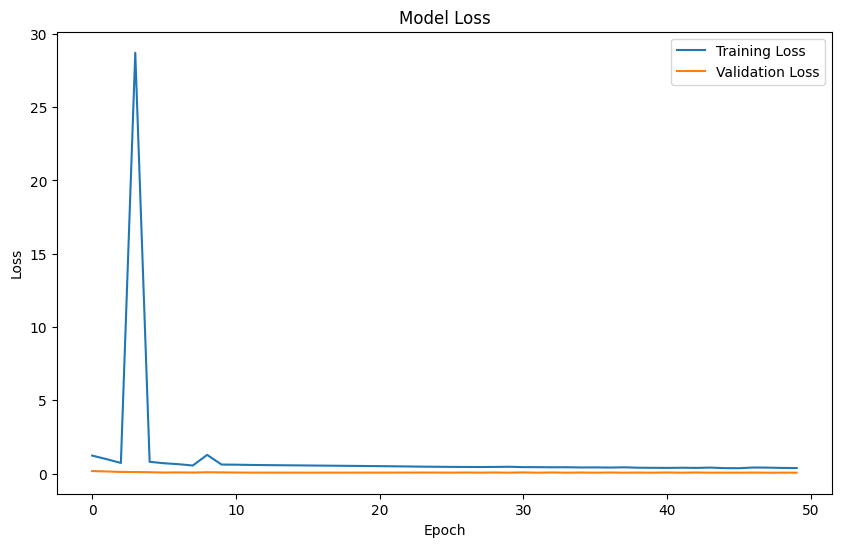

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
mse=np.mean(np.power(y_test-y_pred,2),axis=1) # avergaing mse accross all four features 
threshold = np.percentile(mse, 95) # definning a threshold where only top 5 percent og high errors are anomalies 
anomalies = mse > threshold

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


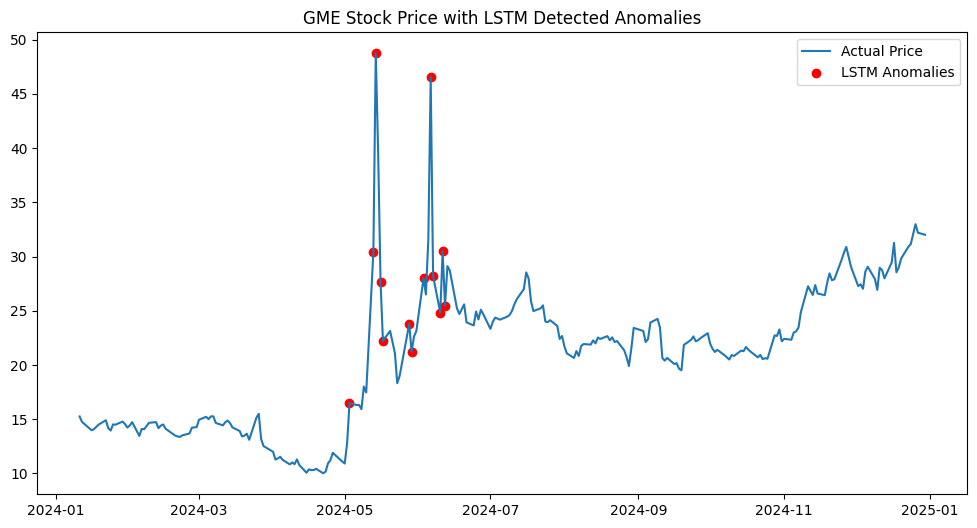

Number of LSTM Detected Anomalies: 13


In [185]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index[train_size+sequence_length:], gme_data['Close'][train_size+sequence_length:], label='Actual Price')
plt.scatter(gme_data.index[train_size+sequence_length:][anomalies], 
            gme_data['Close'][train_size+sequence_length:][anomalies], 
            color='red', label='LSTM Anomalies')
plt.title('GME Stock Price with LSTM Detected Anomalies')
plt.legend()
plt.show()

# Print summary of LSTM anomalies
print(f"Number of LSTM Detected Anomalies: {sum(anomalies)}")

Using autoencoders

In [188]:
features = ['Close', 'Volume', 'Returns', 'Volatility']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gme_data[features])

In [189]:
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [194]:
from tensorflow.keras.layers import Input

In [196]:
input_dim = scaled_data.shape[1]
encoding_dim = 2 #compressed representation

input_layer = Input(shape=(input_dim,)) # number of input features 
encoder1 = Dense(8, activation="relu")(input_layer)
encoder2 = Dense(4, activation="relu")(encoder1)
bottlneck = Dense(encoding_dim, activation="relu")(encoder2)
decoder1 = Dense(4, activation="relu")(bottlneck)
decoder2 = Dense(8, activation="relu")(decoder1)
decoder3 = Dense(input_dim, activation="linear")(decoder2)

In [ ]:
from tensorflow.keras.models import Model
autoencoder = Model(inputs=input_layer, outputs=decoder3) # final decoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [200]:
history = autoencoder.fit(
    train_data, train_data,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.4933 - val_loss: 0.2023
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2631 - val_loss: 0.2118
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3308 - val_loss: 0.2207
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1360 - val_loss: 0.2276
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3888 - val_loss: 0.2370
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1542 - val_loss: 0.2407
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4106 - val_loss: 0.2451
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3387 - val_loss: 0.2502
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3607 - val_loss: 0.2521
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1941 - val_loss: 0.2537
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2595 - val_loss: 0.2570
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2

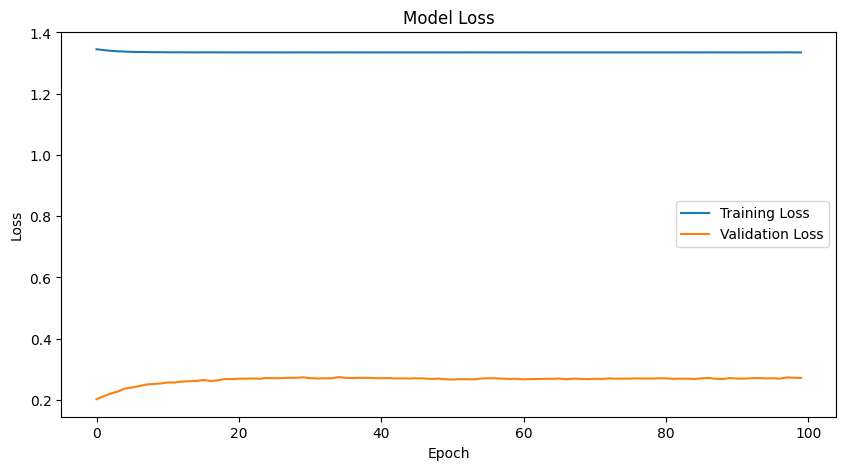

In [201]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [202]:
# Predict on the entire dataset
predictions = autoencoder.predict(scaled_data)
mse = np.mean(np.power(scaled_data - predictions, 2), axis=1)

# Define threshold for anomalies (e.g., 95th percentile of MSE)
threshold = np.percentile(mse, 95)

# Detect anomalies
anomalies = mse > threshold

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


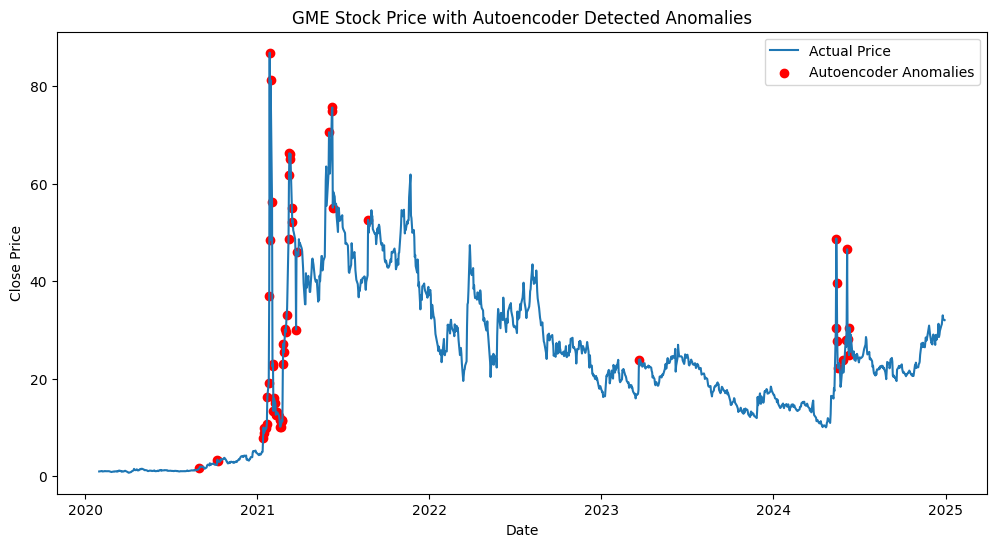

Number of Autoencoder Detected Anomalies: 62


In [203]:
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index, gme_data['Close'], label='Actual Price')
plt.scatter(gme_data.index[anomalies], 
            gme_data.loc[anomalies, 'Close'], 
            color='red', label='Autoencoder Anomalies')
plt.title('GME Stock Price with Autoencoder Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print summary of Autoencoder anomalies
print(f"Number of Autoencoder Detected Anomalies: {sum(anomalies)}")